In [210]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import numpy as np

data = pd.read_csv('accord_sedan.csv') 

data.head()

,price,mileage,year,trim,engine,transmission
0,14995,67697,2006,ex,4 Cyl,Manual
1,11988,73738,2006,ex,4 Cyl,Manual
2,11999,80313,2006,lx,4 Cyl,Automatic
3,12995,86096,2006,lx,4 Cyl,Automatic
4,11333,79607,2006,lx,4 Cyl,Automatic


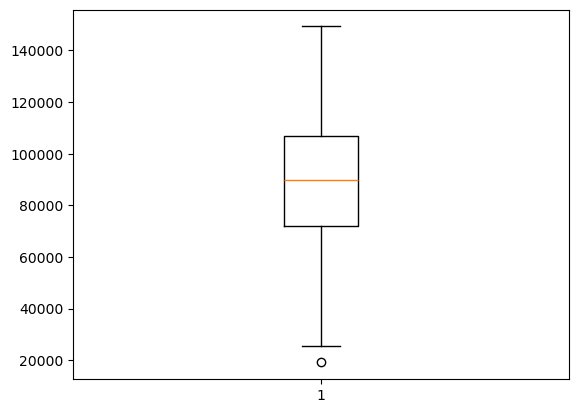

In [170]:
plt.boxplot(data['mileage'])

plt.show()

In [200]:
alt.Chart(data).mark_boxplot().encode(
    alt.X('price:Q').scale(zero=False),
    alt.Y('mileage:Q').scale(zero=False),
    color = alt.Color('isOutlierPrice')
).properties(
    height=600,
    width=600
)
    


alt.Chart(...)

In [172]:
alt.Chart(data).mark_point().encode(
    alt.X('price:Q').scale(zero=False),
    alt.Y('mileage:Q').scale(zero=False)
).properties(
    height=600,
    width=600
)
    


alt.Chart(...)

In [173]:
data.head()

,price,mileage,year,trim,engine,transmission
0,14995,67697,2006,ex,4 Cyl,Manual
1,11988,73738,2006,ex,4 Cyl,Manual
2,11999,80313,2006,lx,4 Cyl,Automatic
3,12995,86096,2006,lx,4 Cyl,Automatic
4,11333,79607,2006,lx,4 Cyl,Automatic


In [174]:
price_standard_deviation = data.price.std()

price_mean = data.price.mean()

mileage_standard_deviation = data.mileage.std()

mileage_mean = data.mileage.mean()



In [175]:

for row in range(len(data)):
    
    if abs(data.loc[row, 'price'] - price_standard_deviation) > 12000 or abs(data.loc[row, 'price'] - price_mean) > 3000:

        data.loc[row, 'isOutlierPrice'] = 1
    
    else:
        data.loc[row, 'isOutlierPrice'] = 0

data.head(500)

,price,mileage,year,trim,engine,transmission,isOutlierPrice
0,14995,67697,2006,ex,4 Cyl,Manual,1.0
1,11988,73738,2006,ex,4 Cyl,Manual,0.0
2,11999,80313,2006,lx,4 Cyl,Automatic,0.0
3,12995,86096,2006,lx,4 Cyl,Automatic,0.0
4,11333,79607,2006,lx,4 Cyl,Automatic,0.0
...,...,...,...,...,...,...,...
412,12456,67564,2006,lx,4 Cyl,Automatic,0.0
413,10995,69775,2006,ex,4 Cyl,Automatic,0.0
414,16000,77997,2006,exl,4 Cyl,Automatic,1.0
415,14700,61892,2006,ex,4 Cyl,Automatic,1.0


In [176]:
i = 0

for row in range(len(data)):
    
    if abs(data.loc[row, 'mileage'] - mileage_standard_deviation) > 200000 or abs(data.loc[row, 'mileage'] - mileage_mean) > 25000:

        data.loc[row, 'isOutlierMileage'] = 1
    
    else:
        data.loc[row, 'isOutlierMileage'] = 0

data.head(500)


,price,mileage,year,trim,engine,transmission,isOutlierPrice,isOutlierMileage
0,14995,67697,2006,ex,4 Cyl,Manual,1.0,0.0
1,11988,73738,2006,ex,4 Cyl,Manual,0.0,0.0
2,11999,80313,2006,lx,4 Cyl,Automatic,0.0,0.0
3,12995,86096,2006,lx,4 Cyl,Automatic,0.0,0.0
4,11333,79607,2006,lx,4 Cyl,Automatic,0.0,0.0
...,...,...,...,...,...,...,...,...
412,12456,67564,2006,lx,4 Cyl,Automatic,0.0,0.0
413,10995,69775,2006,ex,4 Cyl,Automatic,0.0,0.0
414,16000,77997,2006,exl,4 Cyl,Automatic,1.0,0.0
415,14700,61892,2006,ex,4 Cyl,Automatic,1.0,1.0


In [201]:


alt.Chart(data).mark_point().encode(
    alt.X('price:Q').scale(zero=False),
    alt.Y('mileage:Q').scale(zero=False),
    color = alt.Color('isOutlierPrice')#, scale=alt.Scale(scheme='dark2'))
).properties(
    height=600,
    width=600
)
    


alt.Chart(...)

In [202]:


alt.Chart(data).mark_point().encode(
    alt.X('price:Q').scale(zero=False),
    alt.Y('mileage:Q').scale(zero=False),
    color = alt.Color('isOutlierMileage')#, scale=alt.Scale(scheme='dark2'))
).properties(
    height=600,
    width=600
)
    


alt.Chart(...)

In [209]:
tb_data = pd.read_csv('TB_burden_countries_2014-09-29.csv')

tb_data.drop(columns=['iso2', 'iso3', 'source_mort', 'country', 'g_whoregion', 'source_tbhiv'], axis=1, inplace=True)

tb_data.fillna(tb_data.mean(), inplace=True, )

tb_data.isna().sum()

iso_numeric                 0
year                        0
e_pop_num                   0
e_prev_100k                 0
e_prev_100k_lo              0
e_prev_100k_hi              0
e_prev_num                  0
e_prev_num_lo               0
e_prev_num_hi               0
e_mort_exc_tbhiv_100k       0
e_mort_exc_tbhiv_100k_lo    0
e_mort_exc_tbhiv_100k_hi    0
e_mort_exc_tbhiv_num        0
e_mort_exc_tbhiv_num_lo     0
e_mort_exc_tbhiv_num_hi     0
e_inc_100k                  0
e_inc_100k_lo               0
e_inc_100k_hi               0
e_inc_num                   0
e_inc_num_lo                0
e_inc_num_hi                0
e_tbhiv_prct                0
e_tbhiv_prct_lo             0
e_tbhiv_prct_hi             0
e_inc_tbhiv_100k            0
e_inc_tbhiv_100k_lo         0
e_inc_tbhiv_100k_hi         0
e_inc_tbhiv_num             0
e_inc_tbhiv_num_lo          0
e_inc_tbhiv_num_hi          0
c_cdr                       0
c_cdr_lo                    0
c_cdr_hi                    0
dtype: int

In [221]:
tb_mean = tb_data.e_inc_100k_hi.std()
tb_std = tb_data.e_inc_100k_hi.mean()

normal = np.random.normal(tb_mean, tb_std , 4903)

abs(tb_mean - np.mean(normal))

1.9952704329865867

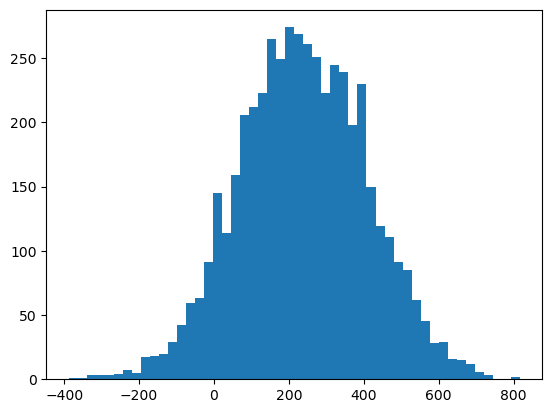

In [230]:
plt.hist(normal, 50)

plt.plot(50, 1/(tb_std * np.sqrt(2 * np.pi)) * np.exp( - (50 - tb_mean)**2 / (2 * tb_std **2)))

plt.show()

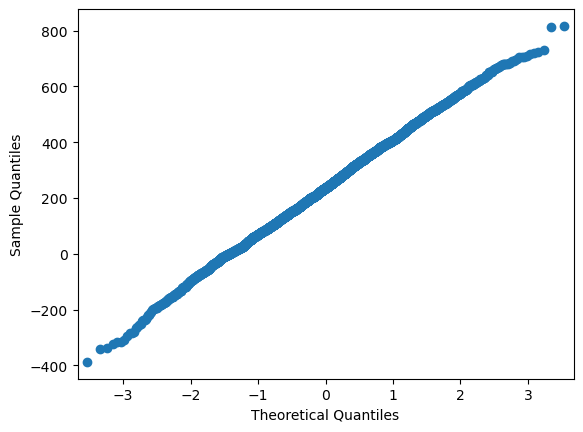

In [231]:
fig = sm.qqplot(normal)